In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn import metrics
from sklearn import preprocessing
from sklearn import svm

/home/olja/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [4]:
df_original = pd.read_csv('online_shoppers_intention.csv')

### Opis skupa:

In [5]:
df_original.sample(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
4935,0,0.000000,0,0.000,4,28.000000,0.000000,0.050000,0.000000,0.6,May,4,1,1,1,Returning_Visitor,False,False
8285,0,0.000000,0,0.000,6,50.833333,0.033333,0.050000,0.000000,0.0,Nov,1,1,3,2,New_Visitor,False,False
12183,0,0.000000,0,0.000,17,278.666667,0.015686,0.042666,0.000000,0.0,Nov,3,2,1,6,Returning_Visitor,True,False
9197,8,222.875000,4,285.625,31,1622.883333,0.005405,0.017488,15.263997,0.0,Dec,3,2,1,2,Returning_Visitor,False,False
2319,8,119.000000,0,0.000,31,1273.875000,0.000000,0.003922,12.634412,0.0,May,2,4,1,3,New_Visitor,False,True
7250,0,0.000000,0,0.000,9,980.566667,0.000000,0.011111,78.569599,0.0,Sep,2,2,5,2,New_Visitor,False,True
12211,6,270.750000,0,0.000,6,217.500000,0.000000,0.020000,0.000000,0.0,Dec,3,2,4,2,New_Visitor,True,False
8308,27,853.735949,2,126.500,584,24844.156200,0.002099,0.009347,4.511100,0.0,Nov,2,4,3,8,Returning_Visitor,False,False
6500,13,243.650000,0,0.000,20,234.016667,0.016000,0.022000,0.000000,0.0,Oct,2,2,1,2,Returning_Visitor,False,False
5431,0,0.000000,0,0.000,28,608.522727,0.015385,0.021953,0.000000,0.0,May,2,2,1,6,Returning_Visitor,True,False


In [6]:
df_original.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


### Atributi:

In [7]:
for c in df_original.columns:
    print(c)

Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
ProductRelated_Duration
BounceRates
ExitRates
PageValues
SpecialDay
Month
OperatingSystems
Browser
Region
TrafficType
VisitorType
Weekend
Revenue


### Vizualizacija raspodele podataka

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4206c8ef60>,
      dtype=object)

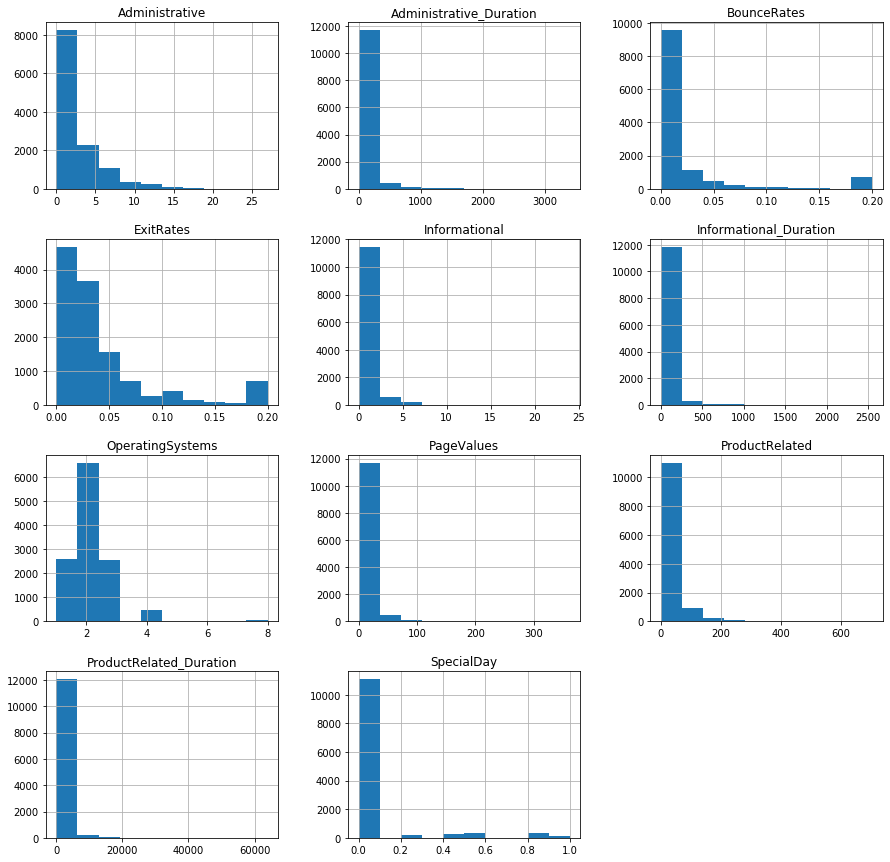

In [8]:
pd.DataFrame.hist(df_original, column = df_original.columns[:12], figsize = [15,15])

In [9]:
print(f'Broj instanci: {df_original.shape[0]}\nBroj atributa: {df_original.shape[1]}')

Broj instanci: 12330
Broj atributa: 18


### Ciljna promenljiva biće Revenue (prihod)

In [10]:
all_revenue = df_original['Revenue']
revenue = df_original['Revenue'].unique()
n_classes = revenue.shape[0]

### Klase:

In [11]:
for c in revenue:
    print(c)

False
True


In [12]:
print('False: {}\nTrue: {}'.format(np.sum(all_revenue == False), np.sum(all_revenue == True)))

False: 10422
True: 1908


In [13]:
changes = dict( zip(revenue, range(n_classes)))
binary_revenue = all_revenue.replace(changes)

(array([10422.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1908.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

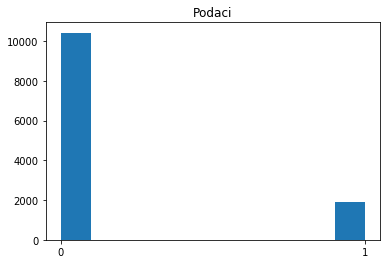

In [14]:
plt.title('Podaci')
plt.xticks([0,1])
plt.hist(binary_revenue)

#plt.savefig('klase.png')

In [15]:
print('Nedostajuce vrednosti u podacima:\n')
print(df_original.isnull().sum())

Nedostajuce vrednosti u podacima:

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Koje atribute zadržavamo?

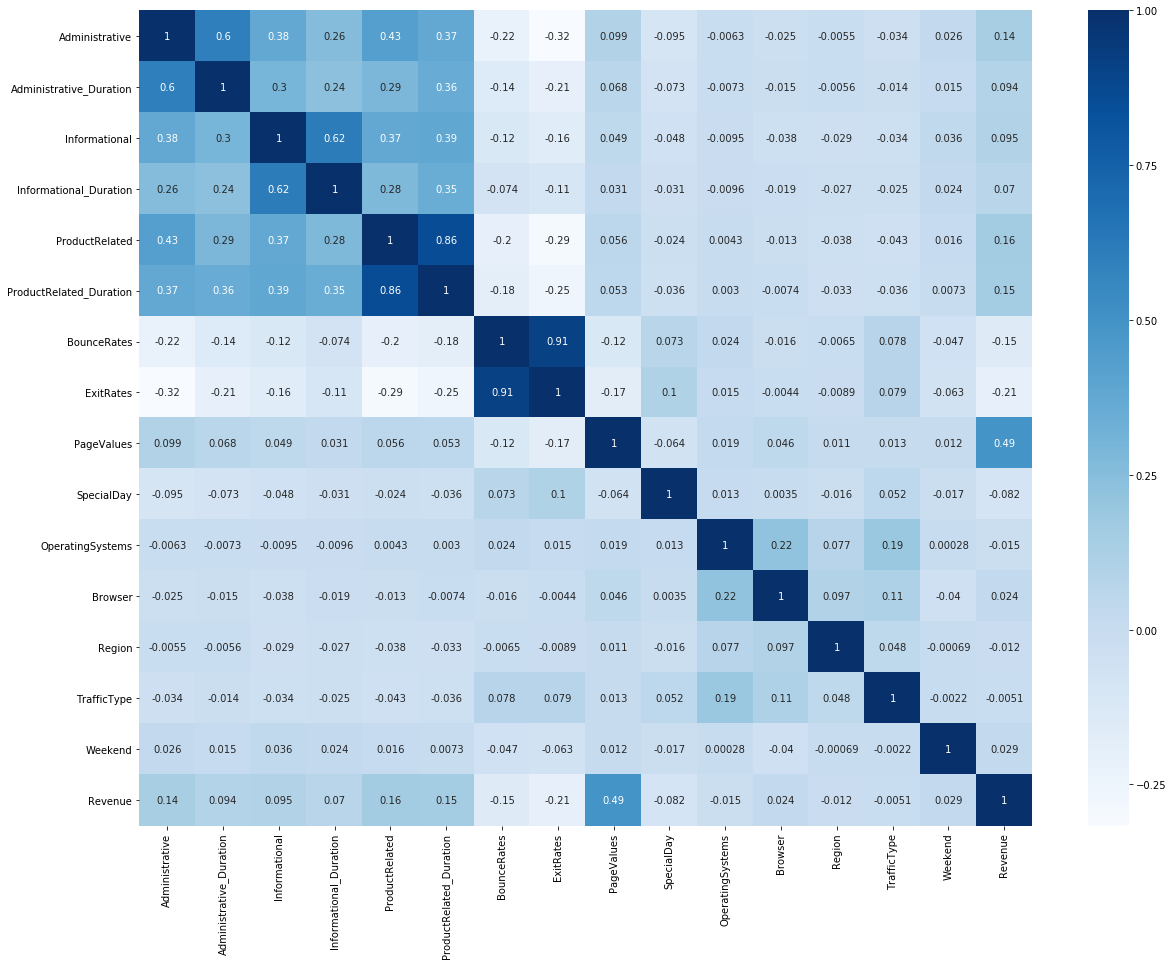

In [16]:
plt.figure(figsize = (20,15))
correlation_matrix = df_original.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = plt.cm.Blues)

#plt.savefig('korelacija.png')

### Možemo izbaciti kolone koje su visoko korelirane ( >= 0.85 )

In [17]:
df_original = df_original.drop(['ExitRates', 'ProductRelated_Duration'], axis = 1)

### Na osnovu onoga što nam je vratio XGBoost izbacujemo nerelevantne atribute ( eksperimentalno )

In [19]:
# Pod komentarom je jer je korišćeno samo eksperimentalno
#df_original = df_original.drop(['Informational_Duration', 'Weekend', 'Browser', 'SpecialDay'], axis = 1)

### Enkodiranje kategoričkih atributa

In [20]:
df = pd.get_dummies(df_original, columns = ['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Month', 'Weekend'])

# Ako izbacimo atribute na osnovu XGBoost algoritma, enkodiramo sledeće atribute:
#df = pd.get_dummies(df_original, columns = ['OperatingSystems', 'Region', 'TrafficType', 'VisitorType', 'Month'])

In [21]:
df = df.replace(changes)

In [22]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Revenue', 'OperatingSystems_1', 'OperatingSystems_2',
       'OperatingSystems_3', 'OperatingSystems_4', 'OperatingSystems_5',
       'OperatingSystems_6', 'OperatingSystems_7', 'OperatingSystems_8',
       'Browser_1', 'Browser_2', 'Browser_3', 'Browser_4', 'Browser_5',
       'Browser_6', 'Browser_7', 'Browser_8', 'Browser_9', 'Browser_10',
       'Browser_11', 'Browser_12', 'Browser_13', 'Region_1', 'Region_2',
       'Region_3', 'Region_4', 'Region_5', 'Region_6', 'Region_7', 'Region_8',
       'Region_9', 'TrafficType_1', 'TrafficType_2', 'TrafficType_3',
       'TrafficType_4', 'TrafficType_5', 'TrafficType_6', 'TrafficType_7',
       'TrafficType_8', 'TrafficType_9', 'TrafficType_10', 'TrafficType_11',
       'TrafficType_12', 'TrafficType_13', 'TrafficType_14', 'TrafficType_15',
       'TrafficType_16', 'Traff

Novi izgled skupa:

In [25]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Revenue,OperatingSystems_1,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.20,0.0,0.0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0.0,0,0.0,2,0.00,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0.0,0,0.0,1,0.20,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,0,0.0,0,0.0,2,0.05,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0.0,0,0.0,10,0.02,0.0,0.0,0,0,...,1,0,0,0,0,0,0,0,0,1


### Podela na skup atributa i specijalni atribut klase

In [26]:
X = df.drop('Revenue', axis = 1)

In [27]:
Y = df['Revenue']

In [28]:
print(f'Atributi koji ce biti korisceni:')
for c in X.columns:
    print(c)

Atributi koji ce biti korisceni:
Administrative
Administrative_Duration
Informational
Informational_Duration
ProductRelated
BounceRates
PageValues
SpecialDay
OperatingSystems_1
OperatingSystems_2
OperatingSystems_3
OperatingSystems_4
OperatingSystems_5
OperatingSystems_6
OperatingSystems_7
OperatingSystems_8
Browser_1
Browser_2
Browser_3
Browser_4
Browser_5
Browser_6
Browser_7
Browser_8
Browser_9
Browser_10
Browser_11
Browser_12
Browser_13
Region_1
Region_2
Region_3
Region_4
Region_5
Region_6
Region_7
Region_8
Region_9
TrafficType_1
TrafficType_2
TrafficType_3
TrafficType_4
TrafficType_5
TrafficType_6
TrafficType_7
TrafficType_8
TrafficType_9
TrafficType_10
TrafficType_11
TrafficType_12
TrafficType_13
TrafficType_14
TrafficType_15
TrafficType_16
TrafficType_17
TrafficType_18
TrafficType_19
TrafficType_20
VisitorType_New_Visitor
VisitorType_Other
VisitorType_Returning_Visitor
Month_Aug
Month_Dec
Month_Feb
Month_Jul
Month_June
Month_Mar
Month_May
Month_Nov
Month_Oct
Month_Sep
Weekend_Fal

### Podela na trening i test skup i standardizacija podataka

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, stratify = Y, random_state = 7)

x_train_before = pd.DataFrame(x_train, columns = X.columns)

scaler = preprocessing.StandardScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled = pd.DataFrame(x_train_scaled, columns = X.columns)
x_test_scaled = pd.DataFrame(x_test_scaled, columns = X.columns)

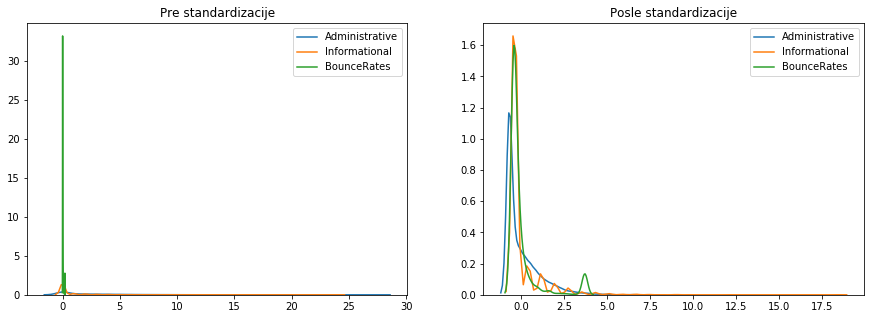

In [30]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (15, 5))

ax1.set_title('Pre standardizacije')
sns.kdeplot(x_train_before['Administrative'], ax = ax1)
sns.kdeplot(x_train_before['Informational'], ax = ax1)
sns.kdeplot(x_train_before['BounceRates'], ax = ax1)

ax2.set_title('Posle standardizacije')
sns.kdeplot(x_train_scaled['Administrative'], ax = ax2)
sns.kdeplot(x_train_scaled['Informational'], ax = ax2)
sns.kdeplot(x_train_scaled['BounceRates'], ax = ax2)

#plt.savefig('standardizacija.png')

### Balansiranje klasa

In [31]:
print('Broj instanci u klasi "1" pre balansiranja: {}'.format(sum(y_train == 1)))
print('Broj instanci u klasi "0" pre balansiranja: {}'.format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy = 'minority', random_state = 2)
x_train_balanced, y_train = sm.fit_sample(x_train_scaled, y_train.ravel())

print()
print('Broj instanci u klasi "1" nakon balansiranja: {}'.format(sum(y_train == 1)))
print('Broj instanci u klasi "0" pre balansiranja: {}'.format(sum(y_train == 0)))

x_train_balanced = pd.DataFrame(x_train_balanced, columns = X.columns)

Broj instanci u klasi "1" pre balansiranja: 1336
Broj instanci u klasi "0" pre balansiranja: 7295

Broj instanci u klasi "1" nakon balansiranja: 7295
Broj instanci u klasi "0" pre balansiranja: 7295


### Skup podataka nakon preprocesiranja ( bez PCA jer on neće biti korišćen svuda )

In [32]:
X_new = pd.concat([x_train_balanced, x_test_scaled])
df1 = pd.DataFrame(y_train)
df1.columns = ['Revenue']
df2 = pd.DataFrame(y_test)
Y_new = pd.concat([df1, df2])

X_new = X_new.loc[~X_new.index.duplicated(keep = 'first')]
Y_new = Y_new.loc[~Y_new.index.duplicated(keep = 'first')]
final = pd.concat([X_new, Y_new], axis = 1)

#final.to_csv(r'preprocesiran_skup.csv')

### Algoritam XGBoost - korišćen za odabir atributa

In [33]:
xg_clf = xgb.XGBClassifier()
xg_clf.fit(x_train_balanced, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

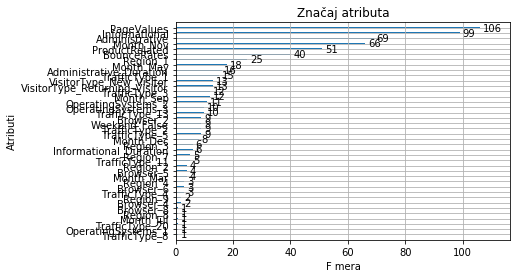

In [34]:
xgb.plot_importance(xg_clf, ylabel = 'Atributi', title = 'Značaj atributa', xlabel = 'F mera')

# plt.savefig('atr.png')

Na osnovu onoga što nam je vratio XGBoost možemo odrediti bitne atribute

### Primena algoritma PCA za smanjenje dimenzionalnosti

In [35]:
pca = PCA(0.95)
pca.fit(x_train_balanced)

x_train_pca = pca.transform(x_train_balanced)
x_test_pca = pca.transform(x_test_scaled)

## Učenje modela

### Logistička regresija

In [38]:
parameters = {
    'C': np.linspace(1, 10, 10),
}

lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, verbose = 8, cv = 5, n_jobs = 3)
clf.fit(x_train_balanced, y_train)

clf.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   12.4s
[Parallel(n_jobs=3)]: Done  35 tasks      | elapsed:   25.8s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   34.3s finished
/home/olja/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


{'C': 1.0}

In [39]:
lr = LogisticRegression(C = 1.0, penalty = 'l2', solver = 'lbfgs', max_iter = 200)
lr.fit(x_train_balanced, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=200,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Evaluacija

In [40]:
def evaluate(model, x_tr, x_tst):
    y_test_predicted = model.predict(x_tst)
    test_score = metrics.accuracy_score(y_test, y_test_predicted)
    y_train_predicted = model.predict(x_tr)
    train_score = metrics.accuracy_score(y_train, y_train_predicted)
    print("Train score: {train}\nTest score: {test}".format(train = train_score, test = test_score))
    
    print()
    print(metrics.classification_report(y_test, y_test_predicted))
    
    return y_test_predicted

In [41]:
def draw_matrix(y_tst_predicted, cmap):
    confusion_matrix = metrics.confusion_matrix(y_test, y_tst_predicted)
    
    fig, ax = plt.subplots()
    img = ax.imshow(confusion_matrix, interpolation = 'nearest', cmap = cmap)
    ax.figure.colorbar(img, ax = ax)

    ax.set(xticks = np.arange(confusion_matrix.shape[1]),
           yticks = np.arange(confusion_matrix.shape[0]),
           xticklabels = ['False', 'True'], yticklabels = ['False', 'True'],
           title = 'Matrica konfuzije',
           ylabel = 'Prava klasa',
           xlabel = 'Predviđena klasa')

    fmt = '.2f' 
    thresh = confusion_matrix.max() / 2.
    for i in range(confusion_matrix.shape[0]):
        for j in range(confusion_matrix.shape[1]):
            ax.text(j, i, format(confusion_matrix[i, j], fmt),
                    ha = "center", va = "center",
                    color = "white" if confusion_matrix[i, j] > thresh else "black")

    fig.tight_layout()

    #plt.savefig('konf3.png')

Train score: 0.8513365318711447
Test score: 0.8605028386050284

              precision    recall  f1-score   support

           0       0.95      0.89      0.91      3127
           1       0.54      0.72      0.62       572

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.77      3699
weighted avg       0.88      0.86      0.87      3699



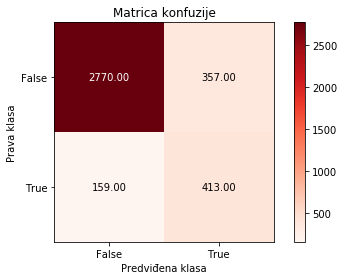

In [42]:
y_test_predicted = evaluate(lr, x_train_balanced, x_test_scaled)
draw_matrix(y_test_predicted, plt.cm.Reds)

### Stabla odlučivanja

In [43]:
# params = {
#     'max_depth' : [3, 5, 7, 10, 15, 20],
#     'criterion' : ['gini', 'entropy']
# }

In [44]:
# dt = DecisionTreeClassifier()
# grid = GridSearchCV(dt, params, cv = 5, verbose = 8)
# grid.fit(x_train_balanced, y_train)
# grid.best_params_

In [45]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7)

In [46]:
dt.fit(x_train_balanced, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Train score: 0.9229609321453051
Test score: 0.8780751554474182

              precision    recall  f1-score   support

           0       0.94      0.91      0.93      3127
           1       0.59      0.68      0.63       572

    accuracy                           0.88      3699
   macro avg       0.77      0.80      0.78      3699
weighted avg       0.89      0.88      0.88      3699



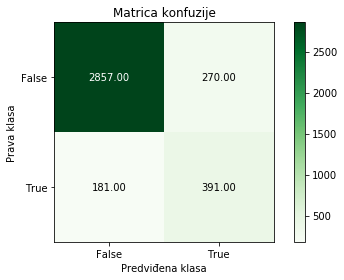

In [47]:
y_test_predicted = evaluate(dt, x_train_balanced, x_test_scaled)
draw_matrix(y_test_predicted, plt.cm.Greens)

### SVM

#### SVM bez kernela

In [48]:
# params = {
#     'C' : range(1, 3, 2),
# }

In [49]:
# lin = svm.LinearSVC()
# grid = GridSearchCV(lin, params, cv = 5, verbose = 8)
# grid.fit(x_train_balanced, y_train)
# grid.best_params_

In [50]:
lin_svm = svm.LinearSVC(loss = 'hinge', C = 1.0)
lin_svm.fit(x_train_balanced, y_train)

/home/olja/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
          penalty='l2', random_state=None, tol=0.0001, verbose=0)

Train score: 0.8605209047292666
Test score: 0.8767234387672344

              precision    recall  f1-score   support

           0       0.95      0.90      0.93      3127
           1       0.58      0.72      0.64       572

    accuracy                           0.88      3699
   macro avg       0.76      0.81      0.79      3699
weighted avg       0.89      0.88      0.88      3699



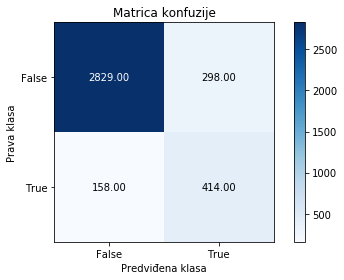

In [51]:
y_test_predicted = evaluate(lin_svm, x_train_balanced, x_test_scaled)
draw_matrix(y_test_predicted, plt.cm.Blues)

#### SVM sa kernelom

In [52]:
# params = {
#     'kernel' : ['rbf', 'poly', 'sigmoid'],
#     'C' : [1.0, 2.0]
# }

In [53]:
# lin_ker = svm.SVC(kernel = 'rbf')
# grid = GridSearchCV(lin_ker, params, cv = 5, verbose = 8)
# grid.fit(x_train_balanced, y_train)
# grid.best_params_

In [54]:
kernelized_svm = svm.SVC(kernel = 'rbf', C = 2.0)
kernelized_svm.fit(x_train_balanced, y_train)

/home/olja/.local/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Train score: 0.9372172721041809
Test score: 0.8640173019735063

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3127
           1       0.55      0.64      0.59       572

    accuracy                           0.86      3699
   macro avg       0.74      0.77      0.76      3699
weighted avg       0.87      0.86      0.87      3699



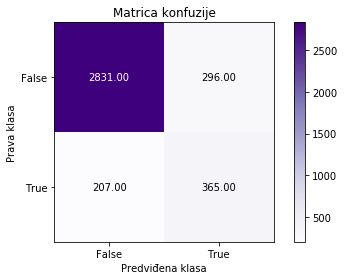

In [55]:
y_test_predicted = evaluate(kernelized_svm, x_train_balanced, x_test_scaled)
draw_matrix(y_test_predicted, plt.cm.Purples)

### Random decision forest

In [56]:
# params = {
#     'n_estimators' : range(5, 20, 5),
#     'criterion' : ['gini', 'entropy']
# }

In [57]:
# rfc = RandomForestClassifier()
# grid = GridSearchCV(rfc, params, cv = 5, verbose = 8)
# grid.fit(x_train_balanced, y_train)
# grid.best_params_

In [58]:
rfc = RandomForestClassifier(n_estimators = 15, criterion = 'entropy')

In [59]:
rfc.fit(x_train_balanced, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train score: 0.9984921178889651
Test score: 0.8842930521762639

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      3127
           1       0.63      0.63      0.63       572

    accuracy                           0.88      3699
   macro avg       0.78      0.78      0.78      3699
weighted avg       0.88      0.88      0.88      3699



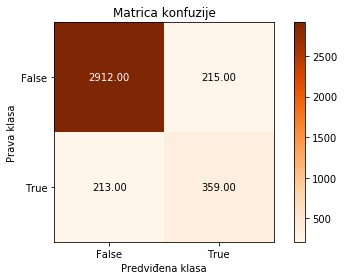

In [60]:
y_test_predicted = evaluate(rfc, x_train_balanced, x_test_scaled)
draw_matrix(y_test_predicted, plt.cm.Oranges)

### Konačni model

In [80]:
X = pd.concat([x_train_balanced, x_test_scaled])

y_train = pd.DataFrame(y_train, columns = ['Revenue'])
y_test = pd.DataFrame(y_test, columns = ['Revenue'])
Y = pd.concat([y_train, y_test])

In [81]:
rfc.fit(X, Y.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)